<a href="https://colab.research.google.com/github/Daniel-ASG/Aulas_de_cursos/blob/main/Curso_de_Estat%C3%ADstica_Parte_4_Projeto_de_Correla%C3%A7%C3%A3o_e_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [1]:
!pip install scipy==1.2 --upgrade

     |████████████████████████████████| 26.6MB 158kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import probplot

### Importe o dataset

In [43]:
dados = pd.read_csv('https://raw.githubusercontent.com/Daniel-ASG/Aulas_de_cursos/main/dados_projeto_Curso_de_Estat%C3%ADstica_Parte_4.csv', sep=';')

### Visualize o conteúdo do DataFrame

In [44]:
dados.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


### Obtenha e avalie as estatísticas descritivas dos dados

In [45]:
dados.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

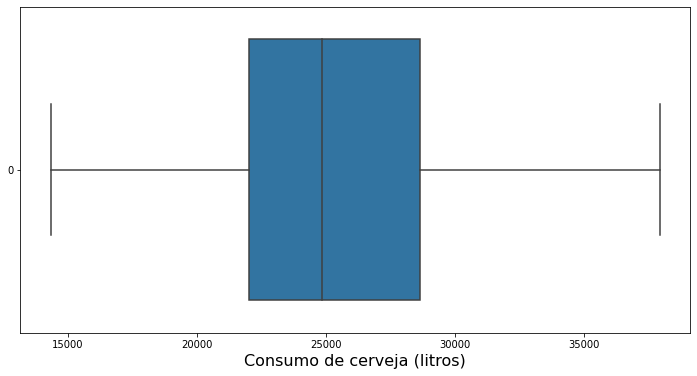

In [50]:
ax = sns.boxplot(data=dados.Y, orient='h')
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Consumo de cerveja (litros)', fontsize=16)
ax;

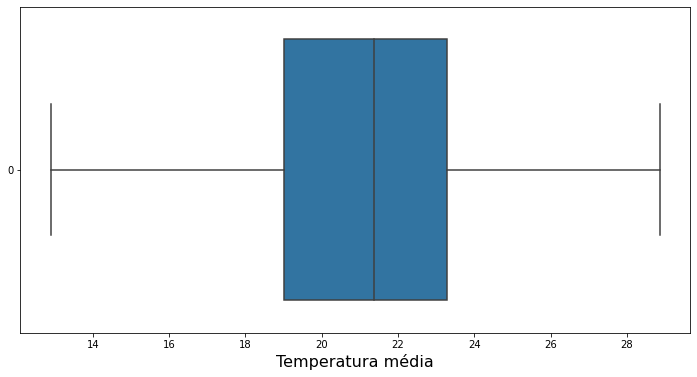

In [51]:
ax = sns.boxplot(data=dados.X, orient='h')
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Temperatura média', fontsize=16)
ax;

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

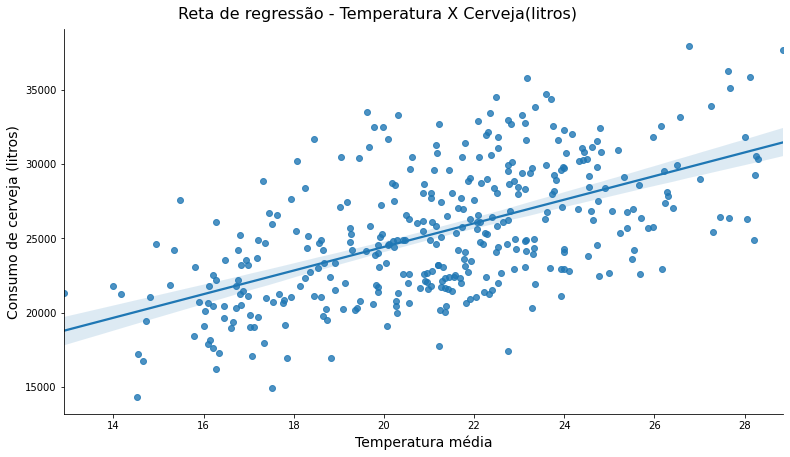

In [57]:
ax = sns.lmplot(data=dados, x='X', y='Y')
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Reta de regressão - Temperatura X Cerveja(litros)', fontsize=16, y=1.02)
ax.set_xlabels('Temperatura média', fontsize=14)
ax.set_ylabels('Consumo de cerveja (litros)', fontsize=14)
ax;

### <font color='red'>Utilizando a matriz de correlação</font>

In [54]:
dados.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Sim

É possível quantificar a intensidade dessa relação?

Resp.: Sim, pelo coeficiente de correlação

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não

### Prepare os dados para estimar um modelo de regressão linear simples

In [59]:
Y = dados.Y
X = sm.add_constant(dados.X)

### Estime o modelo de regressão linear simples

In [60]:
resultado_regressao = sm.OLS(Y, X).fit()

### Visualize o resultado da regressão

In [62]:
print(resultado_regressao.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.328     
Dependent Variable: Y                AIC:                7016.6407 
Date:               2021-04-23 16:33 BIC:                7024.4405 
No. Observations:   365              Log-Likelihood:     -3506.3   
Df Model:           1                F-statistic:        178.9     
Df Residuals:       363              Prob (F-statistic): 1.87e-33  
R-squared:          0.330            Scale:              1.2998e+07
--------------------------------------------------------------------
          Coef.     Std.Err.     t     P>|t|     [0.025     0.975]  
--------------------------------------------------------------------
const   8528.9073  1275.3630   6.6874  0.0000  6020.8796  11036.9349
X        794.8825    59.4226  13.3768  0.0000   678.0269    911.7382
-------------------------------------------------------------------
Omnibus:               11.300        Durbin-Watson:          

### Obtenha o $Y$ previsto

In [63]:
dados['Y_previdto'] = resultado_regressao.predict()
dados.head()

,Y,X,Y_previdto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [66]:
resultado_regressao.predict([1, 42])[0].round(2)

41913.97

### Obtenha os resíduos da regressão

In [68]:
dados['Residuos'] = resultado_regressao.resid
dados.head()

,Y,X,Y_previdto,Residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

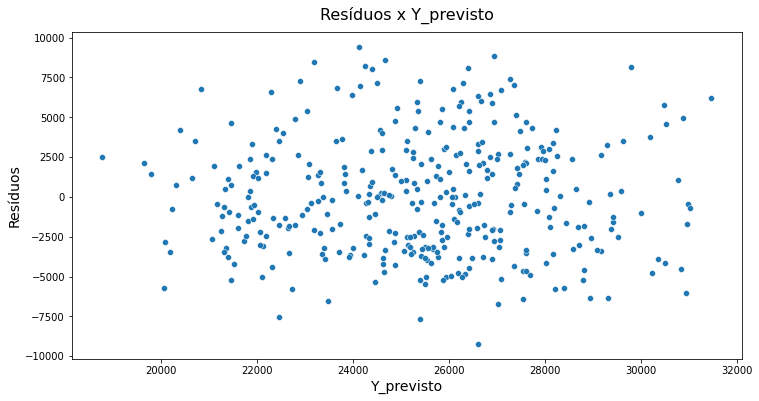

In [72]:
ax = sns.scatterplot(x=dados.Y_previdto, y=dados.Residuos)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos x Y_previsto', fontsize=16, y=1.02)
ax.set_xlabel('Y_previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax;

### Obtenha o QQPlot dos resíduos

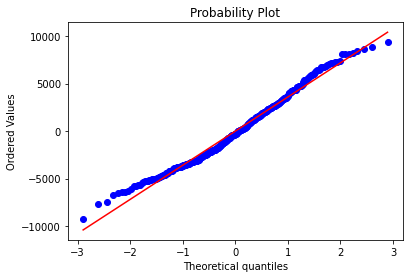

In [73]:
(_, (_, _, _)) = probplot(dados.Residuos, plot=plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [74]:
SQE = resultado_regressao.ssr
SQE

4718394688.067693

In [75]:
SQR = resultado_regressao.ess
SQR

2325899486.7377863

In [76]:
SQT = SQR + SQE
SQT

7044294174.805479

In [77]:
R2 = SQR / SQT
R2

0.33018204933243206

In [78]:
resultado_regressao.rsquared

0.330182049332432